In [1]:
# Relevant imports
import mogreps
import netCDF4
from pathlib import Path

In [3]:
year = 2013
month = 6
day = 15
hour = 3
realization = 0
forecast_period = 3
f = mogreps.download_data(
    'mogreps-uk',
    mogreps.make_data_object_name('mogreps-uk', year, month, day, hour, realization, forecast_period),
    data_folder=Path('.'))
data_set = netCDF4.Dataset(f)

File prods_op_mogreps-uk_20130615_03_00_003.nc already exists.


In [6]:
from matplotlib import pyplot as plt

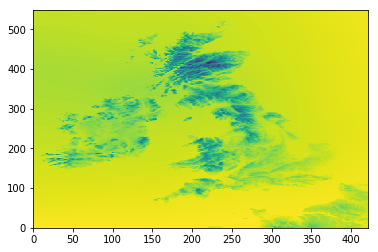

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolormesh(data_set.variables['surface_air_pressure'][0])
plt.show()

In [8]:
import cartopy.crs as ccrs

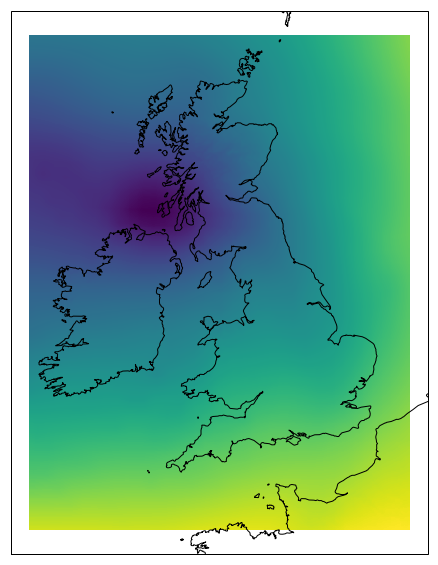

In [25]:
rotation = data_set['rotated_latitude_longitude']
transform = ccrs.RotatedPole(pole_longitude=rotation.grid_north_pole_longitude,
                             pole_latitude=rotation.grid_north_pole_latitude)
projection = transform

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection=projection)
pcm = ax.pcolormesh(data_set['grid_longitude'],
                    data_set['grid_latitude'],
                    data_set['air_pressure_at_sea_level'][0],
                    transform=transform)
ax.coastlines(resolution='10m')
plt.show()